# Part 6: K-Means – DBSCAN clustering

### Mount drive

In [42]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### **Task 1 Data Exploration:** Load the Chicago parcels dataset using Pandas.

In [43]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [44]:
chgo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/chicago_parcels')

#### **Task 2:** Display the first few rows of the dataset. Investigate the available attributes and their data types.

In [ ]:
chgo.head()

POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   
4        5  92  0.01  836300009  836300009   

                                            geometry  
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  
2  POLYGON ((1092323.996 1942962.61, 1092301.306 ...  
3  POLYGON ((1092024.119 1942447.762, 1091997.19 ...  
4  POLYGON ((1091970.533 1942338.191, 1091929.082...

In [ ]:
chgo.shape

(592521, 6)

In [ ]:
chgo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 592521 entries, 0 to 592520
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   POLY_ID   592521 non-null  int32   
 1   ID        592521 non-null  int64   
 2   AREA      592521 non-null  float64 
 3   PIN_OLD   592521 non-null  int64   
 4   PIN       592521 non-null  int64   
 5   geometry  592521 non-null  geometry
dtypes: float64(1), geometry(1), int32(1), int64(3)
memory usage: 24.9 MB


#### **Task 3:** Create a map to visualize the spatial distribution of tax parcel polygons in Chicago. This is a dataset with more than a half millions of records, therefore if you use the traditional matplotlib or pandas you will reach the RAM limit of Colab, you need to use `lonboard` library and the SolidPolygonLayer layer to render polygons.

In [45]:
pip install lonboard

In [46]:
from lonboard import Map, SolidPolygonLayer, viz

In [47]:
viz(chgo)

/usr/local/lib/python3.10/dist-packages/lonboard/_geoarrow/ops/reproject.py:107: UserWarning: Input being reprojected to EPSG:4326 CRS.
Lonboard is only able to render data in EPSG:4326 projection.
  warnings.warn(


Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…

#### **Task 4 Correlation Analysis:** Explore correlations between spatial attributes (latitude, longitude) and numerical attributes. Using the text cell, provide insights into any observed correlations.

##### There is limited data available within the Parcels file. Therefore there are not many correlations.

#### **Task 5 K-Means Clustering:** Implement K-Means clustering with different values of `n_clusters`.

In [ ]:
chgo.head()

In [ ]:
gdf_chgo = chgo

In [ ]:
gdf_chgo.centroid

In [ ]:
chgo["x"] = chgo.centroid.map(lambda p: p.x)
chgo["y"] = chgo.centroid.map(lambda p: p.y)

In [ ]:
gdf_chgo.head()

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns

In [ ]:
# K-means clustering with some default parameters
kmeans = KMeans(n_clusters=5, random_state=42)
gdf_chgo['kmeans_cluster'] = kmeans.fit_predict(gdf_chgo[['x', 'y']])

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
gdf_chgo['kmeans_cluster_adjusted'] = kmeans.fit_predict(gdf_chgo[['x', 'y']])

#### **Task 6:** Visualize the clustering results for each value of `n_clusters`, using multiple lonboard maps, and customized colour ramps.

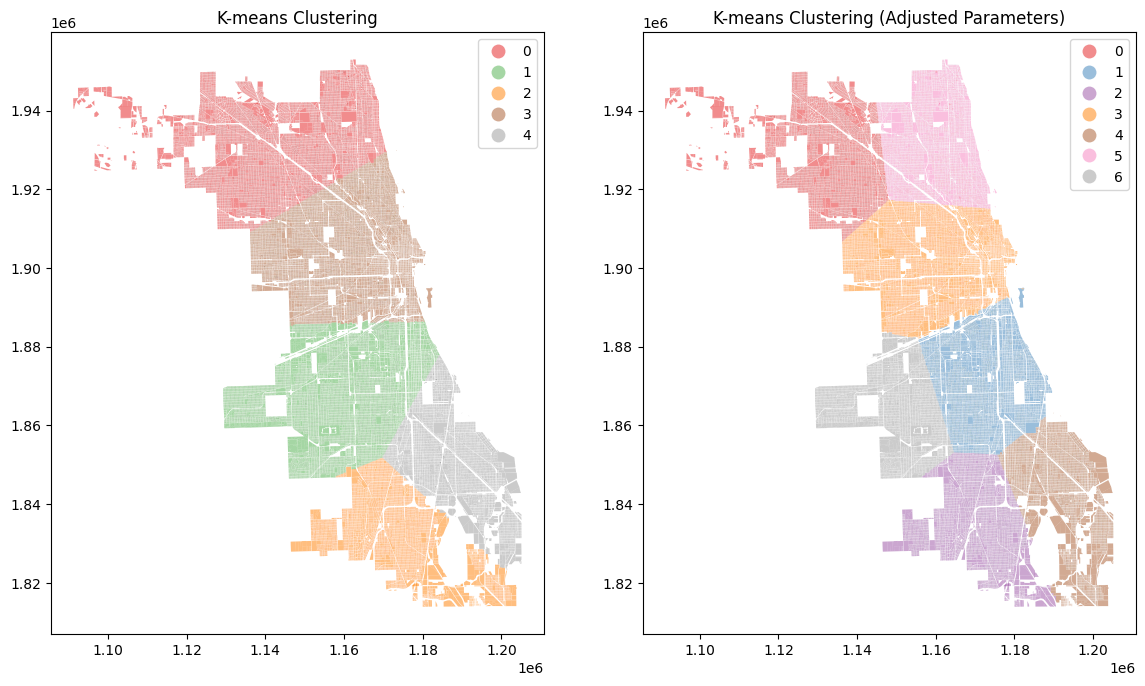

In [ ]:
# Visualize clustering results
fig1, axes = plt.subplots(1,2, figsize=(14, 8))
# K-means
gdf_chgo.plot(ax=axes[0], column='kmeans_cluster', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='Set1')
axes[0].set_title('K-means Clustering')


gdf_chgo.plot(ax=axes[1], column='kmeans_cluster_adjusted', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='Set1')
axes[1].set_title('K-means Clustering (Adjusted Parameters)')

plt.show(fig1)

#### **Task 7:** Evaluate the clustering results and choose an “optimal” value for `n_clusters`. Justify your choice in a markdown cell.

The clustering was different betweeen the different number of clusters.

#### **Task 8 DBSCAN Clustering:** Implement the DBSCAN method. Experiment with different values of eps and `min_samples` in DBSCAN ( at least three)

In [ ]:
# DBSCAN clustering with adjusted parameters, recall what I have described earlier about some clues to define how to modify those parameters based on the data.
dbscan_adjusted = DBSCAN(eps=0.001, min_samples=5)
gdf_chgo['dbscan_cluster_adjusted_1'] = dbscan_adjusted.fit_predict(gdf_chgo[['x', 'y']])

dbscan_adjusted = DBSCAN(eps=0.001, min_samples=25)
gdf_chgo['dbscan_cluster_adjusted_2'] = dbscan_adjusted.fit_predict(gdf_chgo[['x', 'y']])

dbscan_adjusted = DBSCAN(eps=0.001, min_samples=50)
gdf_chgo['dbscan_cluster_adjusted_3'] = dbscan_adjusted.fit_predict(gdf_chgo[['x', 'y']])

dbscan_adjusted = DBSCAN(eps=0.9, min_samples=5)
gdf_chgo['dbscan_cluster_adjusted_4'] = dbscan_adjusted.fit_predict(gdf_chgo[['x', 'y']])

dbscan_adjusted = DBSCAN(eps=0.9, min_samples=25)
gdf_chgo['dbscan_cluster_adjusted_5'] = dbscan_adjusted.fit_predict(gdf_chgo[['x', 'y']])

dbscan_adjusted = DBSCAN(eps=0.9, min_samples=50)
gdf_chgo['dbscan_cluster_adjusted_6'] = dbscan_adjusted.fit_predict(gdf_chgo[['x', 'y']])

dbscan_adjusted = DBSCAN(eps=1.22, min_samples=5)
gdf_chgo['dbscan_cluster_adjusted_7'] = dbscan_adjusted.fit_predict(gdf_chgo[['x', 'y']])

dbscan_adjusted = DBSCAN(eps=1.22, min_samples=25)
gdf_chgo['dbscan_cluster_adjusted_8'] = dbscan_adjusted.fit_predict(gdf_chgo[['x', 'y']])

dbscan_adjusted = DBSCAN(eps=1.22, min_samples=50)
gdf_chgo['dbscan_cluster_adjusted_9'] = dbscan_adjusted.fit_predict(gdf_chgo[['x', 'y']])

#### **Task 9:** Plot the clustering results for each combination of parameters. Therefore, you should create a plot matrix 3*3 ( `min_samples` and `eps`)

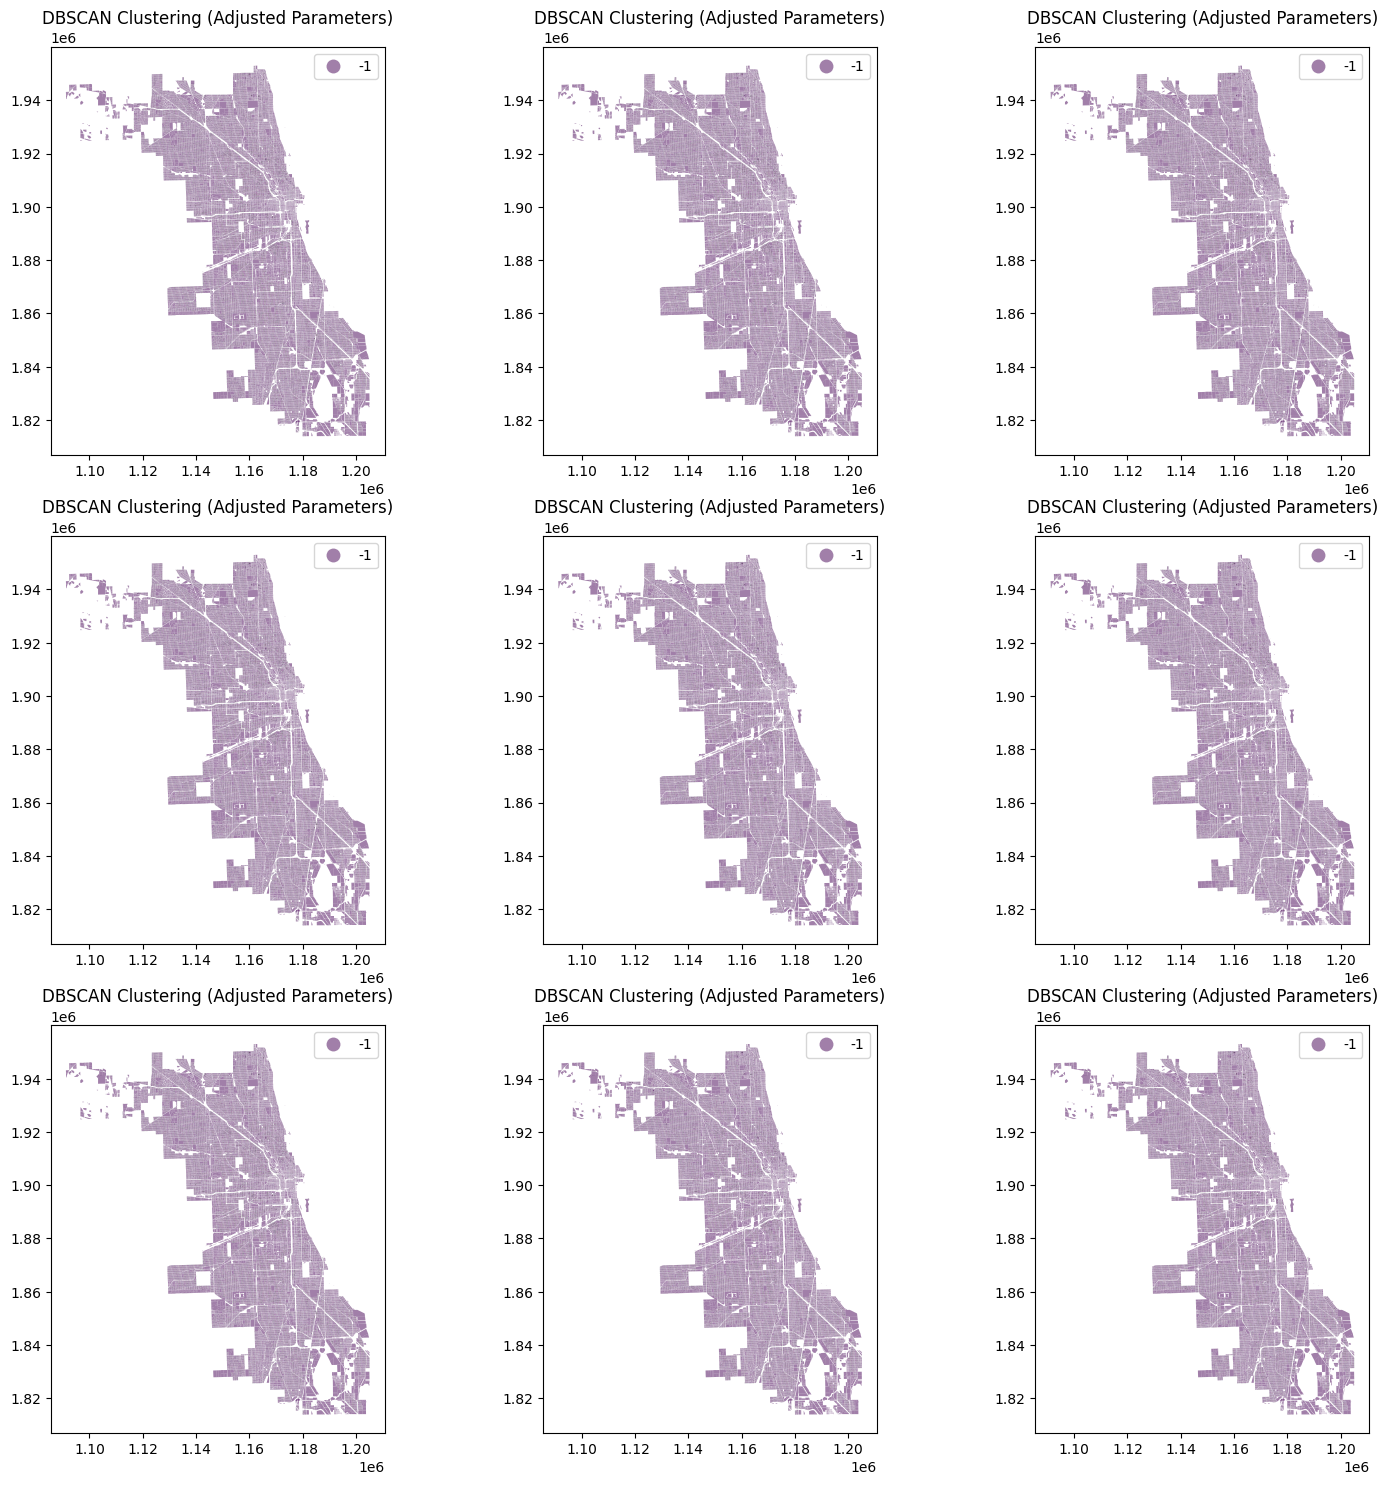

In [ ]:
fig2, axes = plt.subplots(3, 3, figsize=(18, 18))

gdf_chgo.plot(ax=axes[0, 0], column='dbscan_cluster_adjusted_1', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[0, 0].set_title('DBSCAN Clustering (Adjusted Parameters)')

gdf_chgo.plot(ax=axes[0, 1], column='dbscan_cluster_adjusted_2', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[0, 1].set_title('DBSCAN Clustering (Adjusted Parameters)')

gdf_chgo.plot(ax=axes[0, 2], column='dbscan_cluster_adjusted_3', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[0, 2].set_title('DBSCAN Clustering (Adjusted Parameters)')

gdf_chgo.plot(ax=axes[1, 0], column='dbscan_cluster_adjusted_4', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[1, 0].set_title('DBSCAN Clustering (Adjusted Parameters)')

gdf_chgo.plot(ax=axes[1, 1], column='dbscan_cluster_adjusted_5', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[1, 1].set_title('DBSCAN Clustering (Adjusted Parameters)')

gdf_chgo.plot(ax=axes[1, 2], column='dbscan_cluster_adjusted_6', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[1, 2].set_title('DBSCAN Clustering (Adjusted Parameters)')

gdf_chgo.plot(ax=axes[2, 0], column='dbscan_cluster_adjusted_7', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[2, 0].set_title('DBSCAN Clustering (Adjusted Parameters)')

gdf_chgo.plot(ax=axes[2, 1], column='dbscan_cluster_adjusted_8', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[2, 1].set_title('DBSCAN Clustering (Adjusted Parameters)')

gdf_chgo.plot(ax=axes[2, 2], column='dbscan_cluster_adjusted_9', categorical=True, legend=True, markersize=1, alpha=0.5, cmap='viridis')
axes[2, 2].set_title('DBSCAN Clustering (Adjusted Parameters)')

plt.show(fig2)

#### **Task 10:** Using a text cell write your insights about the impact of modifying the `eps` and `min_samples` parameters, and finally recommend suitable values for `eps` and `min_samples` based on your analysis. **Note:** Consider the real-world implications of your findings, especially in the context of urban planning or data-driven decision-making.

##### Visually, there does not seem to be any changes in the map output when either of the parameters are changed.